In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import requests
pd.options.mode.chained_assignment = None
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install mplcyberpunk
import mplcyberpunk
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Navigate to the dataset directory
%cd /content/gdrive/MyDrive/Orbit AI/PA/PA_OFA_7_Gagarin/EDA/car

# List all files in the directory
import os

for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Mounted at /content/gdrive
/content/gdrive/MyDrive/Orbit AI/PA/PA_OFA_7_Gagarin/EDA/car
./toyota.csv
./bmw.csv
./hyundi.csv
./skoda.csv
./cclass.csv
./merc.csv
./vauxhall.csv
./focus.csv
./unclean focus.csv
./vw.csv
./unclean cclass.csv
./ford.csv
./audi.csv
./car.sav


In [3]:

# Import necessary libraries
import pandas as pd
import os

# Define the directory path
directory_path = '/content/gdrive/MyDrive/Orbit AI/PA/PA_OFA_7_Gagarin/EDA/car/'

# List files in the directory and read each CSV file
data = os.listdir(directory_path)

for d in data:
    path = os.path.join(directory_path, d)
    if d.endswith('.csv'):
        df = pd.read_csv(path)
        print(f"Columns in {d}: {df.columns}")

Columns in toyota.csv: Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Columns in bmw.csv: Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Columns in hyundi.csv: Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax(£)', 'mpg', 'engineSize'],
      dtype='object')
Columns in skoda.csv: Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Columns in cclass.csv: Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize'],
      dtype='object')
Columns in merc.csv: Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Columns in vauxhall.csv: Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 't

## Merging all data

In [4]:
# Define the directory path
directory_path = '/content/gdrive/MyDrive/Orbit AI/PA/PA_OFA_7_Gagarin/EDA/car/'

# Initialize an empty DataFrame to store the concatenated data
full_data = pd.DataFrame()

# Iterate over the files in the directory
for file in os.listdir(directory_path):
    if file.endswith('.csv') and file not in ['focus.csv', 'unclean focus.csv', 'unclean cclass.csv']:
        # Read the CSV file
        file_path = os.path.join(directory_path, file)
        df = pd.read_csv(file_path)

        # Add a 'brand' column based on the filename
        brand = file.replace(".csv", "")
        df['brand'] = brand

        # Concatenate to the full dataset
        full_data = pd.concat([full_data, df], ignore_index=True)

# Display the first few rows of the concatenated DataFrame
print(full_data.head())

# Save the concatenated DataFrame to a CSV file
output_path = '/content/gdrive/MyDrive/Orbit AI/PA/PA_OFA_7_Gagarin/EDA/concatenated_data_with_brand.csv'
full_data.to_csv(output_path, index=False)

# Download the concatenated CSV file
from google.colab import files
files.download(output_path)

   model  year  price transmission  mileage fuelType    tax   mpg  engineSize  \
0   GT86  2016  16000       Manual    24089   Petrol  265.0  36.2         2.0   
1   GT86  2017  15995       Manual    18615   Petrol  145.0  36.2         2.0   
2   GT86  2015  13998       Manual    27469   Petrol  265.0  36.2         2.0   
3   GT86  2017  18998       Manual    14736   Petrol  150.0  36.2         2.0   
4   GT86  2017  17498       Manual    36284   Petrol  145.0  36.2         2.0   

    brand  tax(£)  
0  toyota     NaN  
1  toyota     NaN  
2  toyota     NaN  
3  toyota     NaN  
4  toyota     NaN  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
full_data.sample(5)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
20653,I10,2019,9250,Manual,3500,Petrol,NaN,49.6,1.0,hyundi,145.0
9996,1 Series,2017,18690,Automatic,26140,Diesel,145.0,61.4,2.0,bmw,NaN
60925,Golf,2016,13490,Manual,74120,Diesel,20.0,67.3,2.0,vw,NaN
54293,Mokka X,2017,11724,Manual,19256,Petrol,200.0,42.2,1.6,vauxhall,NaN
39488,GLA Class,2020,27300,Semi-Auto,100,Petrol,145.0,35.8,1.6,merc,NaN


In [6]:
full_data.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
54754,Mokka X,2019,13990,Manual,11521,Petrol,145.0,39.2,1.4,vauxhall,NaN
41988,GLA Class,2019,24249,Semi-Auto,6728,Petrol,145.0,36.2,1.6,merc,NaN
81033,EcoSport,2016,9282,Manual,18990,Petrol,125.0,52.3,1.0,ford,NaN
79975,Fiesta,2019,16490,Automatic,3579,Petrol,145.0,48.7,1.0,ford,NaN
30148,C Class,2019,26140,Semi-Auto,11674,Diesel,NaN,NaN,2.0,cclass,NaN


In [7]:
full_data.head

<bound method NDFrame.head of         model  year  price transmission  mileage fuelType    tax   mpg  \
0        GT86  2016  16000       Manual    24089   Petrol  265.0  36.2   
1        GT86  2017  15995       Manual    18615   Petrol  145.0  36.2   
2        GT86  2015  13998       Manual    27469   Petrol  265.0  36.2   
3        GT86  2017  18998       Manual    14736   Petrol  150.0  36.2   
4        GT86  2017  17498       Manual    36284   Petrol  145.0  36.2   
...       ...   ...    ...          ...      ...      ...    ...   ...   
103081     A3  2020  16999       Manual     4018   Petrol  145.0  49.6   
103082     A3  2020  16999       Manual     1978   Petrol  150.0  49.6   
103083     A3  2020  17199       Manual      609   Petrol  150.0  49.6   
103084     Q3  2017  19499    Automatic     8646   Petrol  150.0  47.9   
103085     Q3  2016  15999       Manual    11855   Petrol  150.0  47.9   

        engineSize   brand  tax(£)  
0              2.0  toyota     NaN  
1              2.0  toyota     NaN  
2              2.0  toyota     NaN  
3              2.0  toyota     NaN  
4              2.0  toyota     NaN  
...            ...     ...     ...  
103081         1.0    audi     NaN  
103082         1.0    audi     NaN  
103083         1.0    audi     NaN  
103084         1.4    audi     NaN  
103085         1.4    audi     NaN  

[103086 rows x 11 columns]>

In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103086 entries, 0 to 103085
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         103086 non-null  object 
 1   year          103086 non-null  int64  
 2   price         103086 non-null  int64  
 3   transmission  103086 non-null  object 
 4   mileage       103086 non-null  int64  
 5   fuelType      103086 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    103086 non-null  float64
 9   brand         103086 non-null  object 
 10  tax(£)        4860 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 8.7+ MB


In [9]:
full_data.duplicated().sum()

1577

In [10]:
full_data = full_data.drop_duplicates()

In [11]:
full_data.tail(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
103083,A3,2020,17199,Manual,609,Petrol,150.0,49.6,1.0,audi,NaN
103084,Q3,2017,19499,Automatic,8646,Petrol,150.0,47.9,1.4,audi,NaN
103085,Q3,2016,15999,Manual,11855,Petrol,150.0,47.9,1.4,audi,NaN


In [12]:
s={
    "model": "Focus",
    "year":2018,
    "price":0,
    "transmission":"Automatic",
    "mileage":40000,
    "fuelType": "Petrol",
    "engineSize": 1.6,
    "brand":"ford"
}

mycar=pd.DataFrame([s])

In [13]:
mycar

,model,year,price,transmission,mileage,fuelType,engineSize,brand
0,Focus,2018,0,Automatic,40000,Petrol,1.6,ford


# Popularity of cars

In [14]:
# # Define the directory path
# directory_path = '/content/gdrive/MyDrive/Orbit AI/PA/PA_OFA_7_Gagarin/EDA/car/datacar.csv'

# # List files in the directory and read each CSV file
# full_data = os.listdir(directory_path)

full_data = pd.read_csv('/content/gdrive/MyDrive/Orbit AI/PA/PA_OFA_7_Gagarin/EDA/datacar.csv')



In [15]:
model_count=full_data
ax2= px.treemap(model_count,path=["model"],title="Popularity of the bought car models:")
ax2.show()

# EDA

In [16]:
full_data.describe()

,year,mileage,engineSize,price
count,108540.000000,108540.000000,108540.000000,108540.000000
mean,2017.098028,23025.928469,1.661644,16890.124046
std,2.130057,21176.423684,0.557058,9756.266820
min,1970.000000,1.000000,0.000000,450.000000
25%,2016.000000,7491.750000,1.200000,10229.500000
50%,2017.000000,17265.000000,1.600000,14698.000000
75%,2019.000000,32236.000000,2.000000,20940.000000
max,2060.000000,323000.000000,6.600000,159999.000000


In [17]:
full_data=full_data[full_data.year != 2060]
full_data.shape

(108539, 8)

In [18]:
full_data.columns

Index(['brand', 'model', 'year', 'transmission', 'mileage', 'fuelType',
       'engineSize', 'price'],
      dtype='object')

In [19]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108539 entries, 0 to 108539
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         108539 non-null  object 
 1   model         108539 non-null  object 
 2   year          108539 non-null  int64  
 3   transmission  108539 non-null  object 
 4   mileage       108539 non-null  int64  
 5   fuelType      108539 non-null  object 
 6   engineSize    108539 non-null  float64
 7   price         108539 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 7.5+ MB


In [20]:
full_data.isna().any()

brand           False
model           False
year            False
transmission    False
mileage         False
fuelType        False
engineSize      False
price           False
dtype: bool

In [21]:
full_data.isnull().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
engineSize      0
price           0
dtype: int64

In [22]:
# Number of unique values per column
print("Unique Values Per Column:\n", full_data.nunique())

Unique Values Per Column:
 brand              11
model             195
year               28
transmission        4
mileage         42313
fuelType            5
engineSize         42
price           13299
dtype: int64


In [23]:
#how many rows and columns
rows, columns = full_data.shape
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 108539
Number of Columns: 8


In [24]:
# Find duplicate rows
duplicate_rows = full_data[full_data.duplicated()]
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
          brand    model  year transmission  mileage fuelType  engineSize  \
178     toyota  Corolla  2019       Manual     4500   Petrol         1.2   
286     toyota  Corolla  2019       Manual       10   Petrol         1.2   
397     toyota     RAV4  2016    Automatic    58100   Hybrid         2.5   
398     toyota     RAV4  2017       Manual    34633   Diesel         2.0   
446     toyota     RAV4  2014       Manual    57942   Diesel         2.0   
...        ...      ...   ...          ...      ...      ...         ...   
107393    audi       Q3  2019       Manual       10   Petrol         1.5   
107401    audi       Q5  2019    Automatic       10   Diesel         2.0   
107422    audi       Q3  2019       Manual       10   Petrol         1.5   
107436    audi       A5  2019       Manual       10   Petrol         2.0   
107469    audi       Q3  2019       Manual       10   Diesel         2.0   

        price  
178     17960  
286     15991  
397     17495  
398   

In [25]:
# Drop duplicate rows
full_data_no_duplicates = full_data.drop_duplicates()
print("DataFrame after Dropping Duplicates:\n", full_data_no_duplicates)

DataFrame after Dropping Duplicates:
          brand model  year transmission  mileage fuelType  engineSize  price
0       toyota  GT86  2016       Manual    24089   Petrol         2.0  16000
1       toyota  GT86  2017       Manual    18615   Petrol         2.0  15995
2       toyota  GT86  2015       Manual    27469   Petrol         2.0  13998
3       toyota  GT86  2017       Manual    14736   Petrol         2.0  18998
4       toyota  GT86  2017       Manual    36284   Petrol         2.0  17498
...        ...   ...   ...          ...      ...      ...         ...    ...
108535    audi    A3  2020       Manual     4018   Petrol         1.0  16999
108536    audi    A3  2020       Manual     1978   Petrol         1.0  16999
108537    audi    A3  2020       Manual      609   Petrol         1.0  17199
108538    audi    Q3  2017    Automatic     8646   Petrol         1.4  19499
108539    audi    Q3  2016       Manual    11855   Petrol         1.4  15999

[106065 rows x 8 columns]


In [26]:
##missing data
missing_data = full_data_no_duplicates.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(full_data_no_duplicates))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
brand,0,0.0
model,0,0.0
year,0,0.0
transmission,0,0.0
mileage,0,0.0
fuelType,0,0.0
engineSize,0,0.0
price,0,0.0


In [27]:
full_data_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106065 entries, 0 to 108539
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         106065 non-null  object 
 1   model         106065 non-null  object 
 2   year          106065 non-null  int64  
 3   transmission  106065 non-null  object 
 4   mileage       106065 non-null  int64  
 5   fuelType      106065 non-null  object 
 6   engineSize    106065 non-null  float64
 7   price         106065 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 7.3+ MB


# Top Cars

           Buys
model          
Focus     10042
C Class    7646
Fiesta     6556
Golf       4863
Corsa      3441
Polo       3287
Astra      2805
A Class    2561
3 Series   2443
Kuga       2225


<Axes: xlabel='model'>

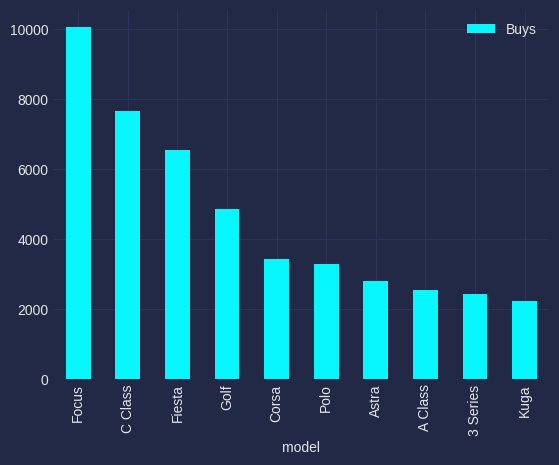

In [28]:
data=full_data
model_buys= data.groupby('model')['model'].count()
model_buys = pd.DataFrame(model_buys)
model_buys.columns = ['Buys']
model_buys.sort_values(by=['Buys'], inplace=True, ascending=False)
model_buys = model_buys.head(10)
print(model_buys.head(20))
plt.style.use("cyberpunk")
model_buys.plot.bar()

# Top Car Model

In [29]:
model_buys1= data.groupby('year')['model'].count()
model_buys1 = pd.DataFrame(model_buys1)
model_buys1.columns = ['Buys']
model_buys1.sort_values(by=['Buys'], inplace=True, ascending=False)
model_buys1 = model_buys1.head(10)
model_buys1.head(20)

,Buys
year,
2019,29955
2017,23686
2016,16948
2018,15092
2015,8359
2020,4657
2014,4377
2013,2818
2012,702


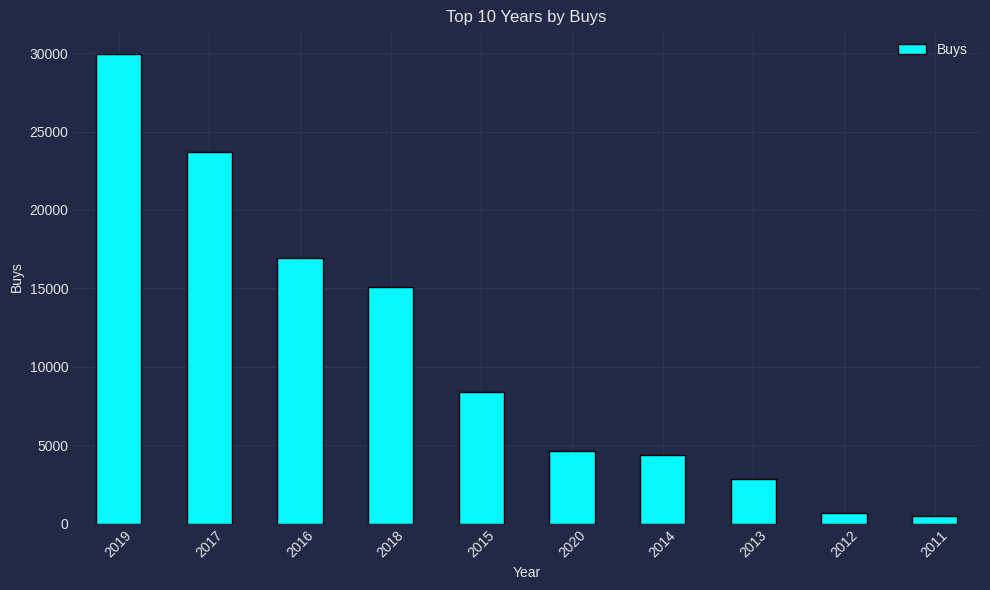

In [30]:
model_buys1.plot.bar(figsize=(10, 6), edgecolor='black')
plt.title('Top 10 Years by Buys')
plt.xlabel('Year')
plt.ylabel('Buys')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Rata-Rata Harga

In [31]:
model_buys2=full_data
model_buys2=model_buys2[["price","year"]].groupby('year').mean()
model_buys2.sort_values(by=['price'], inplace=True, ascending=False)
model_buys2 = model_buys2.head(10)
model_buys2.head(20)

,price
year,
2020,28517.838737
2019,23535.764814
1970,17747.000000
2018,16310.332229
2017,14463.352022
2016,13374.278322
2015,11655.549587
2014,9998.366690
2013,8539.841732


Text(0.5, 52.583333333333314, 'Model price')

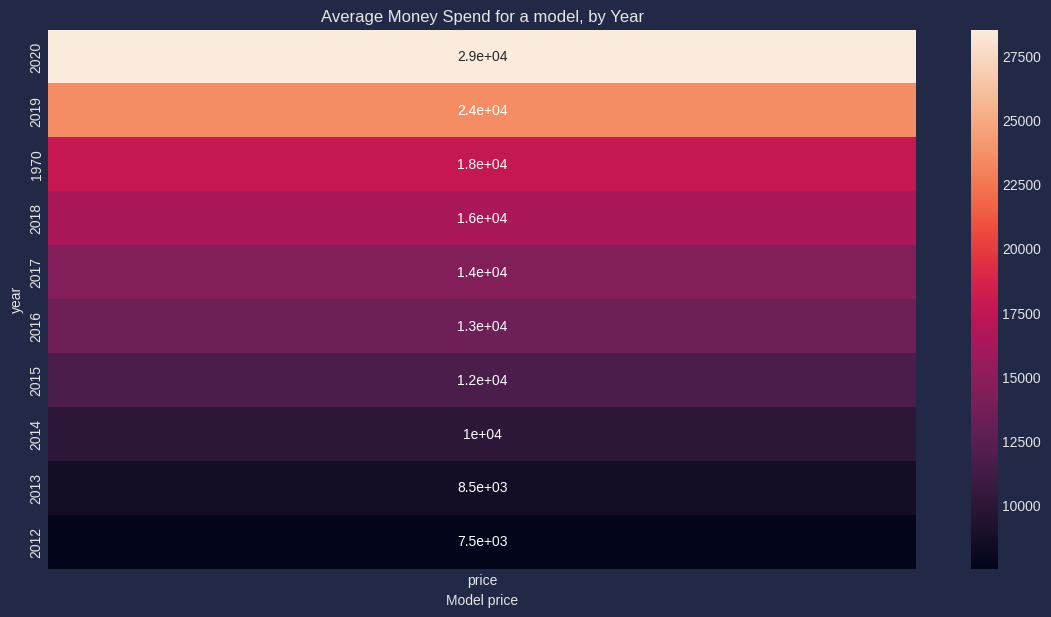

In [32]:
plt.figure(figsize=(14,7))
plt.title("Average Money Spend for a model, by Year")
sns.heatmap(data=model_buys2, annot=True)
plt.xlabel("Model price")

# Tipe Transmission

In [33]:
model_trans=data
model_trans= model_trans.groupby('transmission')['model'].count()
model_trans.head(20)

transmission
Automatic    22318
Manual       61308
Other           10
Semi-Auto    24903
Name: model, dtype: int64

# Tipe Year

In [34]:
model_trans=full_data
model_trans=full_data
model_trans=model_trans[model_trans.year != 1970]
model_trans=model_trans[model_trans.year != 1991]

model_trans3 = model_trans[model_trans.transmission == "Automatic"]
model_trans3= model_trans.groupby('year')['model'].count()

model_trans3.head(50)

year
1995        1
1996        2
1997        4
1998        9
1999        6
2000        9
2001       20
2002       36
2003       39
2004       55
2005       84
2006       92
2007      185
2008      233
2009      321
2010      369
2011      477
2012      702
2013     2818
2014     4377
2015     8359
2016    16948
2017    23686
2018    15092
2019    29955
2020     4657
Name: model, dtype: int64

In [35]:
model_trans2=full_data
model_trans2 = model_trans2[model_trans2.transmission == "Manual"]
model_trans2= model_trans2.groupby('year')['model'].count()

model_trans4=full_data
model_trans4 = model_trans4[model_trans4.transmission == "Semi-Auto"]
model_trans4= model_trans4.groupby('year')['model'].count()

# Automatic VS Manual

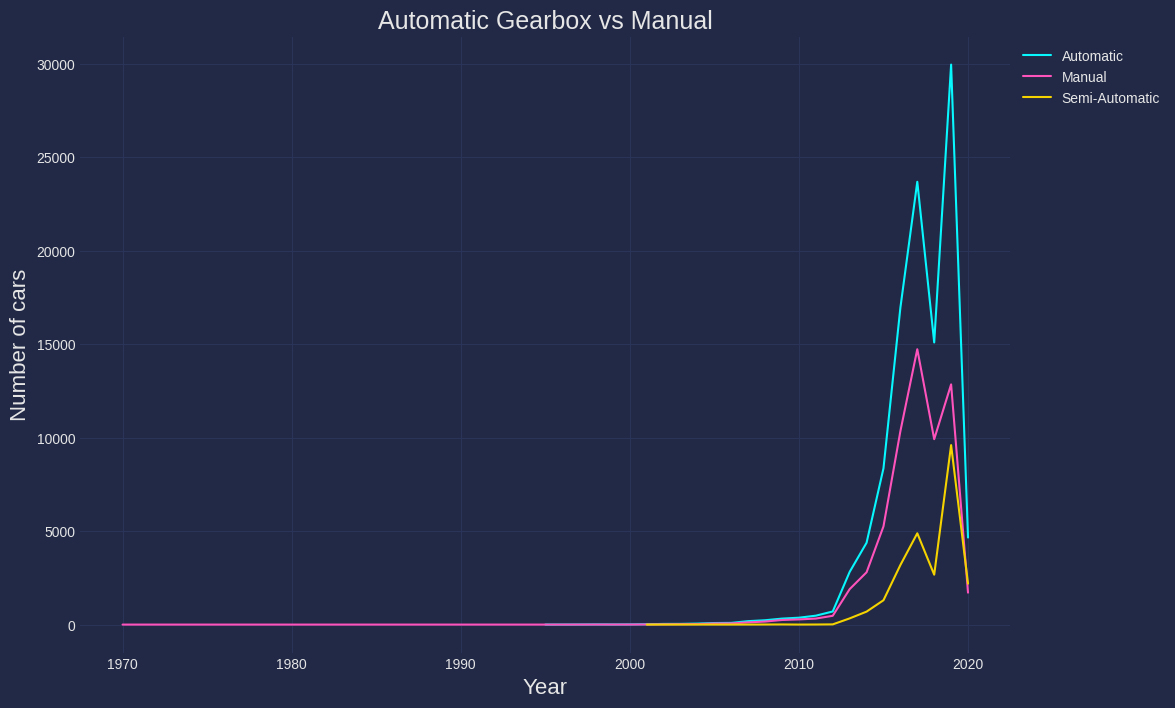

In [36]:
plt.style.use("cyberpunk")
model_trans3.plot(kind = 'line', label = 'Automatic', figsize = (12, 8))
model_trans2.plot(kind = 'line', label = 'Manual', figsize = (12, 8))
model_trans4.plot(kind = 'line', label = 'Semi-Automatic', figsize = (12, 8))
plt.title('Automatic Gearbox vs Manual', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of cars', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1);

# fuelType

In [37]:
model_fuel=data
model_fuel= model_fuel.groupby('fuelType')['model'].count()
model_fuel.head(20)

fuelType
Diesel      45177
Electric        6
Hybrid       3229
Other         253
Petrol      59874
Name: model, dtype: int64

In [38]:
model_fuel=full_data
model_fuel1=full_data
model_fuel2=full_data
model_fuel3=full_data
model_fuel4=full_data

model_fuel=full_data
model_fuel=model_fuel[model_fuel.year != 1970]
model_fuel=model_fuel[model_fuel.year != 1991]

model_fuel1=model_fuel1[model_fuel1.year != 1970]
model_fuel1=model_fuel1[model_fuel1.year != 1991]

model_fuel1 = model_fuel1[model_fuel1.fuelType == "Diesel"]
model_fuel1= model_fuel1.groupby('year')['model'].count()

model_fuel2 = model_fuel2[model_fuel2.fuelType == "Electric"]
model_fuel2= model_fuel2.groupby('year')['model'].count()

model_fuel3 = model_fuel3[model_fuel3.fuelType == "Hybrid"]
model_fuel3= model_fuel3.groupby('year')['model'].count()

model_fuel4 = model_fuel4[model_fuel4.fuelType == "Petrol"]
model_fuel4= model_fuel4.groupby('year')['model'].count()

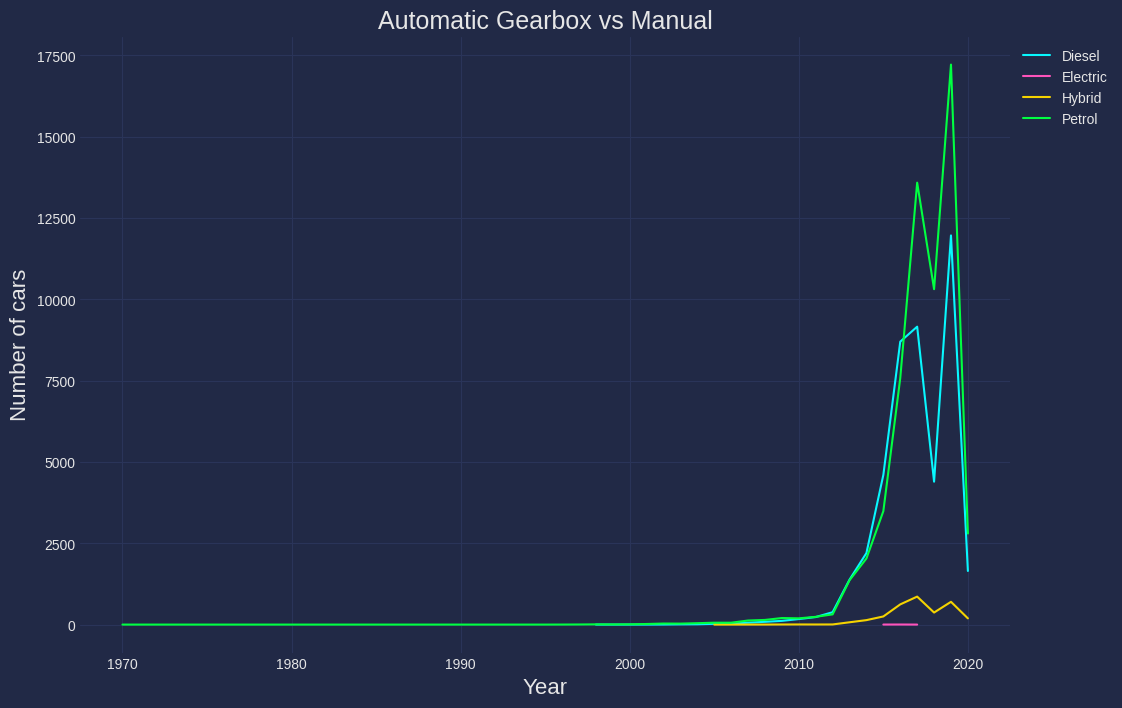

In [39]:
plt.style.use("cyberpunk")
model_fuel1.plot(kind = 'line', label = "Diesel", figsize = (12, 8))
model_fuel2.plot(kind = 'line', label = "Electric", figsize = (12, 8))
model_fuel3.plot(kind = 'line', label = "Hybrid", figsize = (12, 8))
model_fuel4.plot(kind = 'line', label = "Petrol", figsize = (12, 8))
plt.title('Automatic Gearbox vs Manual', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of cars', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1);

# Modelling

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', None)

In [41]:

full_data = pd.read_csv('/content/gdrive/MyDrive/Orbit AI/PA/PA_OFA_7_Gagarin/EDA/datacar.csv')
full_data.head()

,brand,model,year,transmission,mileage,fuelType,engineSize,price
0,toyota,GT86,2016,Manual,24089,Petrol,2.0,16000
1,toyota,GT86,2017,Manual,18615,Petrol,2.0,15995
2,toyota,GT86,2015,Manual,27469,Petrol,2.0,13998
3,toyota,GT86,2017,Manual,14736,Petrol,2.0,18998
4,toyota,GT86,2017,Manual,36284,Petrol,2.0,17498


In [42]:
full_data.shape

(108540, 8)

In [43]:
full_data.dtypes

brand            object
model            object
year              int64
transmission     object
mileage           int64
fuelType         object
engineSize      float64
price             int64
dtype: object

In [44]:
full_data.describe

<bound method NDFrame.describe of          brand model  year transmission  mileage fuelType  engineSize  price
0       toyota  GT86  2016       Manual    24089   Petrol         2.0  16000
1       toyota  GT86  2017       Manual    18615   Petrol         2.0  15995
2       toyota  GT86  2015       Manual    27469   Petrol         2.0  13998
3       toyota  GT86  2017       Manual    14736   Petrol         2.0  18998
4       toyota  GT86  2017       Manual    36284   Petrol         2.0  17498
...        ...   ...   ...          ...      ...      ...         ...    ...
108535    audi    A3  2020       Manual     4018   Petrol         1.0  16999
108536    audi    A3  2020       Manual     1978   Petrol         1.0  16999
108537    audi    A3  2020       Manual      609   Petrol         1.0  17199
108538    audi    Q3  2017    Automatic     8646   Petrol         1.4  19499
108539    audi    Q3  2016       Manual    11855   Petrol         1.4  15999

[108540 rows x 8 columns]>

In [45]:
full_data.info

<bound method DataFrame.info of          brand model  year transmission  mileage fuelType  engineSize  price
0       toyota  GT86  2016       Manual    24089   Petrol         2.0  16000
1       toyota  GT86  2017       Manual    18615   Petrol         2.0  15995
2       toyota  GT86  2015       Manual    27469   Petrol         2.0  13998
3       toyota  GT86  2017       Manual    14736   Petrol         2.0  18998
4       toyota  GT86  2017       Manual    36284   Petrol         2.0  17498
...        ...   ...   ...          ...      ...      ...         ...    ...
108535    audi    A3  2020       Manual     4018   Petrol         1.0  16999
108536    audi    A3  2020       Manual     1978   Petrol         1.0  16999
108537    audi    A3  2020       Manual      609   Petrol         1.0  17199
108538    audi    Q3  2017    Automatic     8646   Petrol         1.4  19499
108539    audi    Q3  2016       Manual    11855   Petrol         1.4  15999

[108540 rows x 8 columns]>

# Encode Model

In [46]:
encoder = LabelEncoder()
full_data['model'] = encoder.fit_transform(full_data['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping

{0: '1 Series',
 1: '180',
 2: '2 Series',
 3: '200',
 4: '220',
 5: '230',
 6: '3 Series',
 7: '4 Series',
 8: '5 Series',
 9: '6 Series',
 10: '7 Series',
 11: '8 Series',
 12: 'A Class',
 13: 'A1',
 14: 'A2',
 15: 'A3',
 16: 'A4',
 17: 'A5',
 18: 'A6',
 19: 'A7',
 20: 'A8',
 21: 'Accent',
 22: 'Adam',
 23: 'Agila',
 24: 'Amarok',
 25: 'Amica',
 26: 'Ampera',
 27: 'Antara',
 28: 'Arteon',
 29: 'Astra',
 30: 'Auris',
 31: 'Avensis',
 32: 'Aygo',
 33: 'B Class',
 34: 'B-MAX',
 35: 'Beetle',
 36: 'C Class',
 37: 'C-HR',
 38: 'C-MAX',
 39: 'CC',
 40: 'CL Class',
 41: 'CLA Class',
 42: 'CLC Class',
 43: 'CLK',
 44: 'CLS Class',
 45: 'Caddy',
 46: 'Caddy Life',
 47: 'Caddy Maxi',
 48: 'Caddy Maxi Life',
 49: 'California',
 50: 'Camry',
 51: 'Caravelle',
 52: 'Cascada',
 53: 'Citigo',
 54: 'Combo Life',
 55: 'Corolla',
 56: 'Corsa',
 57: 'Crossland X',
 58: 'E Class',
 59: 'EcoSport',
 60: 'Edge',
 61: 'Eos',
 62: 'Escort',
 63: 'Fabia',
 64: 'Fiesta',
 65: 'Focus',
 66: 'Fox',
 67: 'Fusion

# Encode Transmission

In [47]:
full_data['transmission'] = encoder.fit_transform(full_data['transmission'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 'Automatic', 1: 'Manual', 2: 'Other', 3: 'Semi-Auto'}

#Encode fuelType

In [48]:
full_data['fuelType'] = encoder.fit_transform(full_data['fuelType'])
fuelType_mapping = {index : label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

{0: 'Diesel', 1: 'Electric', 2: 'Hybrid', 3: 'Other', 4: 'Petrol'}

#Encode Brand

In [49]:
full_data['brand'] = encoder.fit_transform(full_data['brand'])
fuelType_mapping = {index : label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

{0: 'audi',
 1: 'bmw',
 2: 'cclass',
 3: 'focus',
 4: 'ford',
 5: 'hyundi',
 6: 'merc',
 7: 'skoda',
 8: 'toyota',
 9: 'vauxhall',
 10: 'vw'}

In [50]:
full_data.head()

,brand,model,year,transmission,mileage,fuelType,engineSize,price
0,8,75,2016,1,24089,4,2.0,16000
1,8,75,2017,1,18615,4,2.0,15995
2,8,75,2015,1,27469,4,2.0,13998
3,8,75,2017,1,14736,4,2.0,18998
4,8,75,2017,1,36284,4,2.0,17498


In [51]:
# Step 1: Save the concatenated DataFrame to a CSV file
output_path = '/content/gdrive/MyDrive/Orbit AI/PA/PA_OFA_7_Gagarin/Model/full_data.csv'
full_data.to_csv(output_path, index=False)

# Step 2: Print the first few rows of the concatenated DataFrame
print(full_data.head())

# Step 3: Provide a way to download the file directly in Colab
from google.colab import files
files.download(output_path)

   brand  model  year  transmission  mileage  fuelType  engineSize  price
0      8     75  2016             1    24089         4         2.0  16000
1      8     75  2017             1    18615         4         2.0  15995
2      8     75  2015             1    27469         4         2.0  13998
3      8     75  2017             1    14736         4         2.0  18998
4      8     75  2017             1    36284         4         2.0  17498


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>